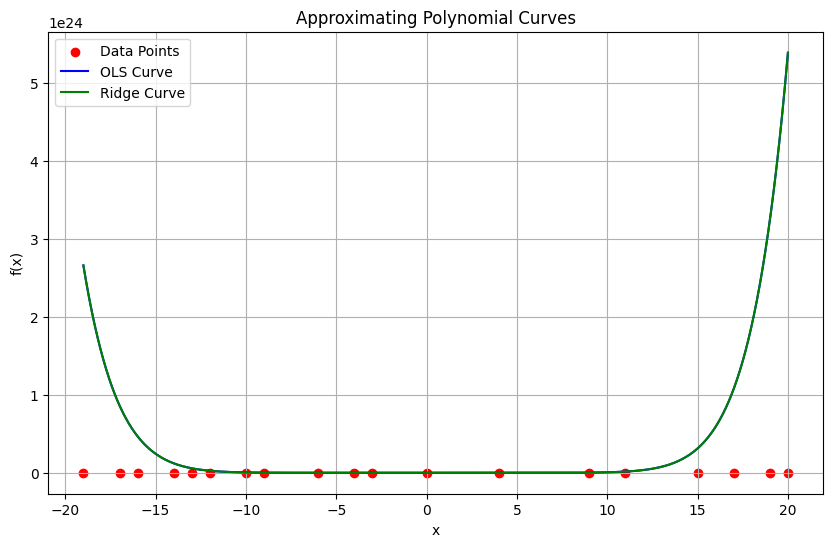

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data_points = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

# Separate the x and y values
x_values = np.array([point[0] for point in data_points])
y_values = np.array([point[1] for point in data_points])

# Create the Vandermonde matrix for polynomial terms up to the 10th degree
degree = 10
Vandermonde_matrix = np.vander(x_values, degree + 1, increasing=True)

# Calculate the OLS estimates
ols_parameters = np.linalg.inv(Vandermonde_matrix.T @ Vandermonde_matrix) @ Vandermonde_matrix.T @ y_values

# Ridge regularization parameter
ridge_lambda = 1000

# Calculate the Ridge Regularized estimates
ridge_parameters = np.linalg.inv(Vandermonde_matrix.T @ Vandermonde_matrix + ridge_lambda * np.identity(degree + 1)) @ Vandermonde_matrix.T @ y_values

# Generate points for the polynomial curves
x_curve = np.linspace(min(x_values), max(x_values), 500)
ols_curve = np.polyval(ols_parameters[::-1], x_curve)
ridge_curve = np.polyval(ridge_parameters[::-1], x_curve)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points', color='red')
plt.plot(x_curve, ols_curve, label='OLS Curve', color='blue')
plt.plot(x_curve, ridge_curve, label='Ridge Curve', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Approximating Polynomial Curves')
plt.legend()
plt.grid(True)
plt.show()


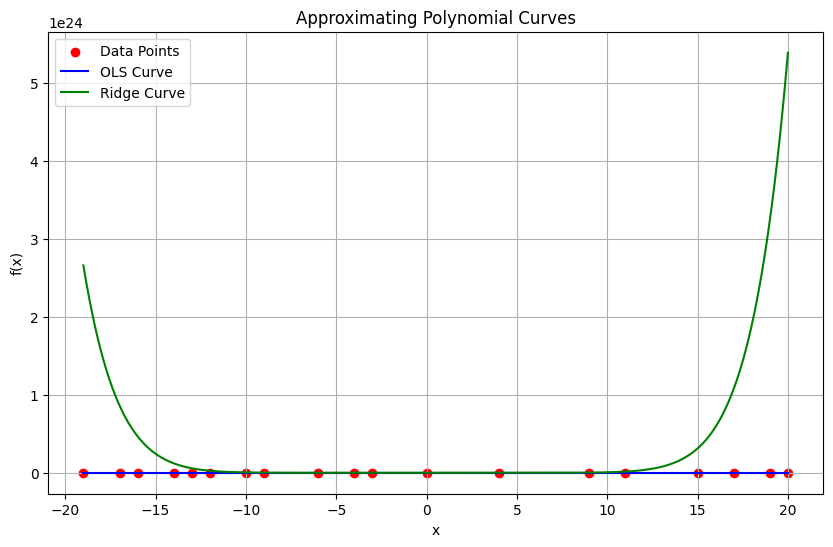

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
data_points = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

# Extract x and y values from data
x_values = np.array([point[0] for point in data_points])
y_values = np.array([point[1] for point in data_points])

# Create the Vandermonde matrix for polynomial terms
Vandermonde_matrix = np.vander(x_values, 11, increasing=True)

# Calculate OLS estimates
ols_parameters = np.linalg.lstsq(Vandermonde_matrix, y_values, rcond=None)[0]

# Ridge regularization parameter
ridge_lambda = 1000

# Calculate Ridge Regularized estimates
ridge_parameters = np.linalg.solve(
    np.dot(Vandermonde_matrix.T, Vandermonde_matrix) + ridge_lambda * np.identity(11),
    np.dot(Vandermonde_matrix.T, y_values)
)

# Generate points for the polynomial curves
x_curve = np.linspace(min(x_values), max(x_values), 500)
ols_curve = np.polyval(ols_parameters[::-1], x_curve)
ridge_curve = np.polyval(ridge_parameters[::-1], x_curve)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data Points', color='red')
plt.plot(x_curve, ols_curve, label='OLS Curve', color='blue')
plt.plot(x_curve, ridge_curve, label='Ridge Curve', color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Approximating Polynomial Curves')
plt.legend()
plt.grid(True)
plt.show()


GPT 4


In [1]:
import numpy as np

data = [(-12, 3508773764.33), (0, 8.23), (-3, -1817.19), (-9, 223172941.89), 
        (-14, 14972489218.13), (20, -616038985298.39), (15, -46647273946.87), 
        (-13, 7219976272.81), (-6, 3834402.29), (9, -568338726.84), 
        (-16, 53374816586.25), (-17, 91848086984.74), (19, -406415090728.42), 
        (17, -140585922641.56), (-10, 587827177.29), (11, -3241624198.39), 
        (-4, 26305.61), (4, -556869.05), (-19, 253537431975.71)]

x_values = [point[0] for point in data]
y_values = [point[1] for point in data]


In [2]:
coefficients_ols = np.polyfit(x_values, y_values, 10)


In [5]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Transform our x data to polynomial features
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.array(x_values).reshape(-1, 1))

ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_poly, y_values)
coefficients_ridge = ridge.coef_


ModuleNotFoundError: No module named 'sklearn'